In [2]:
import pandas as pd
import random
import pickle
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', None)

import datetime as dt
# from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('raw_data.csv')

In [6]:
df.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037,101,S0,443 EAST 180 STREET,NaN,10457.0,1.0,2.0,3.0,1293.0,2820.0,1952.0,1,S0,720000,2022-02-23
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,A5,2327 WASHINGTON AVE,NaN,10458.0,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A5,499999,2022-04-28
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,A1,469 EAST 185 STREET,NaN,10458.0,1.0,0.0,1.0,1650.0,1296.0,1910.0,1,A1,599000,2022-05-17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98270 entries, 0 to 98269
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         98270 non-null  int64         
 1   NEIGHBORHOOD                    98270 non-null  object        
 2   BUILDING_CLASS_CATEGORY         98270 non-null  object        
 3   TAX_CLASS_AT_PRESENT            98210 non-null  object        
 4   BLOCK                           98270 non-null  int64         
 5   LOT                             98270 non-null  int64         
 6   BUILDING_CLASS_AT_PRESENT       98210 non-null  object        
 7   ADDRESS                         98270 non-null  object        
 8   APARTMENT_NUMBER                25280 non-null  object        
 9   ZIP_CODE                        98268 non-null  float64       
 10  RESIDENTIAL_UNITS               74209 non-null  float64       
 11  CO

## Data Prep & EDA

In [9]:
df['BOROUGH'].unique()

array([2, 3, 1, 4, 5])

In [10]:
df['BOROUGH']=df['BOROUGH'].astype('str')

In [11]:
df['BOROUGH']=df['BOROUGH'].str.replace('1','Manhattan')
df['BOROUGH']=df['BOROUGH'].str.replace('2','Bronx')
df['BOROUGH']=df['BOROUGH'].str.replace('3','Brooklyn')
df['BOROUGH']=df['BOROUGH'].str.replace('4','Queens')
df['BOROUGH']=df['BOROUGH'].str.replace('5','Staten_Island')

In [12]:
df['BOROUGH'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten_Island'],
      dtype=object)

In [13]:
# print(df['NEIGHBORHOOD'].value_counts().to_dict())

In [14]:
# print(df['BUILDING CLASS CATEGORY'].value_counts().to_dict())

In [15]:
# print(df['BUILDING CLASS AT PRESENT'].value_counts().to_dict())

In [16]:
# df.ADDRESS.nunique()

In [17]:
# df['APARTMENT NUMBER'].value_counts().to_dict()

In [18]:
# print(df['ZIP CODE'].value_counts().to_dict())

In [19]:
df['ZIP_CODE']=df['ZIP_CODE'].astype('Int64')

In [20]:
df['ZIP_CODE'].isnull().value_counts()

False    98268
True         2
Name: ZIP_CODE, dtype: int64

In [21]:
df['ZIP_CODE'].unique()

<IntegerArray>
[10457, 10458, 10456, 10469, 10466, 10475, 10468, 10467, 10460, 10462,
 ...
 10305,  <NA>, 10303, 10310, 10301, 10304, 10306, 10308, 10302, 10307]
Length: 187, dtype: Int64

In [22]:
df=df.dropna(subset=['ZIP_CODE'])

In [23]:
df['ZIP_CODE'].isnull().value_counts()

False    98268
Name: ZIP_CODE, dtype: int64

In [24]:
df['ZIP_CODE']=df['ZIP_CODE'].astype('str')

In [25]:
# print(df['RESIDENTIAL UNITS'].value_counts().to_dict())

In [26]:
# print(df['COMMERCIAL UNITS'].value_counts().to_dict())

In [27]:
# print(df['TOTAL UNITS'].value_counts().to_dict())

In [28]:
# df['TOTAL UNITS'].unique()

In [29]:
# print(df['LAND SQUARE FEET'].value_counts().to_dict())

In [30]:
# print(df['GROSS SQUARE FEET'].value_counts().to_dict())

In [31]:
# print(df['YEAR BUILT'].value_counts().to_dict())

In [32]:
df['BLOCK']=df['BLOCK'].astype('str')
df['LOT']=df['LOT'].astype('str')
df['TAX_CLASS_AT_TIME_OF_SALE']=df['TAX_CLASS_AT_TIME_OF_SALE'].astype('str')

In [33]:
df['SALE_PRICE']=df['SALE_PRICE'].astype('float')

In [34]:
# df.to_pickle('data_for_EDA.pkl')

In [35]:
# df=pd.read_pickle('data_for_EDA.pkl')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98268 entries, 0 to 98269
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         98268 non-null  object        
 1   NEIGHBORHOOD                    98268 non-null  object        
 2   BUILDING_CLASS_CATEGORY         98268 non-null  object        
 3   TAX_CLASS_AT_PRESENT            98208 non-null  object        
 4   BLOCK                           98268 non-null  object        
 5   LOT                             98268 non-null  object        
 6   BUILDING_CLASS_AT_PRESENT       98208 non-null  object        
 7   ADDRESS                         98268 non-null  object        
 8   APARTMENT_NUMBER                25280 non-null  object        
 9   ZIP_CODE                        98268 non-null  object        
 10  RESIDENTIAL_UNITS               74207 non-null  float64       
 11  CO

In [37]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,74207.00000,55048.00000,77363.00000,51892.00000,51892.00000,90962.00000,98268.00000
mean,3.03469,0.34236,3.15449,6000.22221,5901.47125,1953.22981,1573352.72973
std,21.62517,10.41035,22.95612,99835.41720,44156.73076,36.26104,11334694.71328
min,0.00000,0.00000,0.00000,0.00000,0.00000,1800.00000,0.00000
25%,1.00000,0.00000,1.00000,2000.00000,1368.00000,1925.00000,0.00000
50%,1.00000,0.00000,1.00000,2500.00000,1963.00000,1950.00000,610950.00000
75%,2.00000,0.00000,2.00000,4000.00000,2852.00000,1980.00000,1100000.00000
max,800.00000,2261.00000,2261.00000,5799632.00000,2400000.00000,2022.00000,1033000000.00000


In [38]:
df[df['SALE_PRICE'].isnull()].shape[0]

0

In [39]:
# df[df['SALE_PRICE']==1033000000]

In [40]:
# df[df['SALE_PRICE']==1100000]

In [41]:
df.groupby(['BOROUGH']).agg({'SALE_PRICE':['sum','max','min']}).apply(lambda s: s.apply('{0:.5f}'.format))

SALE_PRICE                           
                             sum               max      min
BOROUGH                                                    
Bronx           7344202529.00000   119000000.00000  0.00000
Brooklyn       39522888111.00000   256795000.00000  0.00000
Manhattan      79318481826.00000  1033000000.00000  0.00000
Queens         22719445830.00000   176000000.00000  0.00000
Staten_Island   5705207749.00000    58700000.00000  0.00000

In [42]:
##How many zero dollar transactions
zero=(df[df['SALE_PRICE']==0]).reset_index(drop=True)
print(zero.shape[0])
print(zero.shape[0]/df.shape[0])

25471
0.2591993324378231


In [43]:
small=df[df['SALE_PRICE']<=10000]
print(small.shape[0]/df.shape[0])

0.2742296576708593


In [44]:
df[df['LAND_SQUARE_FEET'].isnull()&df['GROSS_SQUARE_FEET'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
50,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178 STREET, 2C",NaN,10457,NaN,NaN,NaN,NaN,NaN,1935.0,2,D4,72000.0,2021-10-29
51,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 4C",NaN,10457,NaN,NaN,NaN,NaN,NaN,1935.0,2,D4,66000.0,2021-12-20
52,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 EAST 178TH STREET, 1B",NaN,10457,NaN,NaN,NaN,NaN,NaN,1941.0,2,D4,0.0,2021-08-11
53,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 EAST 178TH STREET, 2A",NaN,10457,NaN,NaN,NaN,NaN,NaN,1941.0,2,D4,72000.0,2021-12-23
444,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1011,R3,"2873 ELY AVE, 2",2,10469,1.0,NaN,1.0,NaN,NaN,2008.0,1,R3,370000.0,2022-03-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98108,Staten_Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,1965,1102,R3,"1235 FOREST HILL ROAD, 1B",1B,10314,1.0,NaN,1.0,NaN,NaN,2015.0,1,R3,445000.0,2022-01-07
98109,Staten_Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1031,R3,438 HAWTHORNE,NaN,10314,1.0,NaN,1.0,NaN,NaN,1980.0,1,R3,0.0,2022-04-05
98110,Staten_Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2087,1047,R3,470 HAWTHORNE AVENUE,NaN,10314,1.0,NaN,1.0,NaN,NaN,1979.0,1,R3,455900.0,2022-04-11
98111,Staten_Island,WILLOWBROOK,04 TAX CLASS 1 CONDOS,1A,2089,1005,R3,"20 DARCEY AVENUE, N/A",NaN,10314,1.0,NaN,1.0,NaN,NaN,1980.0,1,R3,500000.0,2021-06-14


In [45]:
df=df.dropna(subset=['TOTAL_UNITS','GROSS_SQUARE_FEET','YEAR_BUILT'])

In [46]:
df['PPSF']= df['SALE_PRICE']/df['GROSS_SQUARE_FEET']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49805 entries, 0 to 98267
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         49805 non-null  object        
 1   NEIGHBORHOOD                    49805 non-null  object        
 2   BUILDING_CLASS_CATEGORY         49805 non-null  object        
 3   TAX_CLASS_AT_PRESENT            49805 non-null  object        
 4   BLOCK                           49805 non-null  object        
 5   LOT                             49805 non-null  object        
 6   BUILDING_CLASS_AT_PRESENT       49805 non-null  object        
 7   ADDRESS                         49805 non-null  object        
 8   APARTMENT_NUMBER                178 non-null    object        
 9   ZIP_CODE                        49805 non-null  object        
 10  RESIDENTIAL_UNITS               49805 non-null  float64       
 11  CO

In [48]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,PPSF
count,49805.00000,49805.00000,49805.00000,49805.00000,49805.00000,49805.00000,49805.00000,49705.00000
mean,4.06867,0.31374,4.38241,5617.20815,6141.42201,1941.72159,1466825.28824,inf
std,26.32632,10.94108,28.52451,97212.01157,45045.24077,30.81900,13278094.91141,nan
min,0.00000,0.00000,0.00000,0.00000,0.00000,1800.00000,0.00000,0.00000
25%,1.00000,0.00000,1.00000,2000.00000,1440.00000,1920.00000,0.00000,0.00000
50%,2.00000,0.00000,2.00000,2500.00000,2010.00000,1931.00000,575000.00000,308.66808
75%,2.00000,0.00000,2.00000,4000.00000,2917.00000,1960.00000,960000.00000,513.36898
max,800.00000,2261.00000,2261.00000,5799632.00000,2400000.00000,2022.00000,931000000.00000,inf


In [49]:
df.groupby(['BOROUGH'])['NEIGHBORHOOD'].unique().to_dict()

{'Bronx': array(['BATHGATE', 'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT',
        'BRONX PARK', 'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
        'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
        'CROTONA PARK', 'EAST RIVER', 'EAST TREMONT', 'FIELDSTON',
        'FORDHAM', 'HIGHBRIDGE/MORRIS HEIGHTS', 'HUNTS POINT',
        'KINGSBRIDGE HTS/UNIV HTS', 'KINGSBRIDGE/JEROME PARK',
        'MELROSE/CONCOURSE', 'MORRIS PARK/VAN NEST', 'MORRISANIA/LONGWOOD',
        'MOTT HAVEN/PORT MORRIS', 'MOUNT HOPE/MOUNT EDEN', 'PARKCHESTER',
        'PELHAM GARDENS', 'PELHAM PARKWAY NORTH', 'PELHAM PARKWAY SOUTH',
        'RIVERDALE', 'SCHUYLERVILLE/PELHAM BAY', 'SOUNDVIEW',
        'THROGS NECK', 'WAKEFIELD', 'WESTCHESTER', 'WILLIAMSBRIDGE',
        'WOODLAWN'], dtype=object),
 'Brooklyn': array(['BATH BEACH', 'BAY RIDGE', 'BEDFORD STUYVESANT', 'BENSONHURST',
        'BERGEN BEACH', 'BOERUM HILL', 'BOROUGH PARK', 'BRIGHTON BEACH',
        'BROOKLYN HEIGHTS', 'BROWNSVILLE

In [50]:
df.groupby(['BOROUGH'])['NEIGHBORHOOD'].nunique().to_dict()

{'Bronx': 37,
 'Brooklyn': 60,
 'Manhattan': 38,
 'Queens': 59,
 'Staten_Island': 58}

In [51]:
df['Br_Neb']=df['BOROUGH']+'_'+df['NEIGHBORHOOD']

In [52]:
print(df['Br_Neb'].nunique())

252


In [53]:
del df['Br_Neb']

In [54]:
(df[df['SALE_PRICE']>2100000].shape[0])/(df.shape[0])

0.07601646421042065

In [55]:
df1=df[(df['SALE_PRICE']>10000)&(df['SALE_PRICE']<2100000)]   #&(df['SALE PRICE']<2100000)

<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

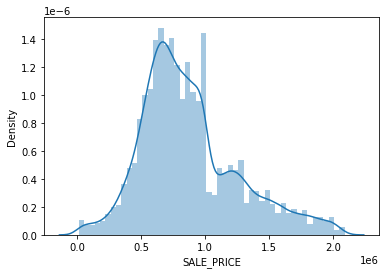

In [56]:
sns.distplot(df1['SALE_PRICE'])

<AxesSubplot:xlabel='SALE_PRICE', ylabel='Density'>

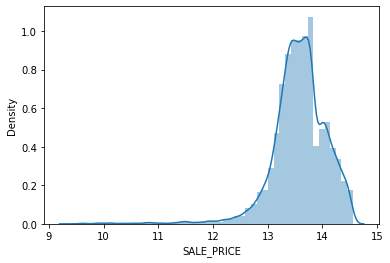

In [57]:
sns.distplot(np.log(df1['SALE_PRICE'])) 

In [58]:
df1=df1[['SALE_PRICE','TOTAL_UNITS','GROSS_SQUARE_FEET','YEAR_BUILT','BOROUGH','NEIGHBORHOOD','BUILDING_CLASS_CATEGORY']]
df1

,SALE_PRICE,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY
0,720000.0,3.0,2820.0,1952.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS
1,499999.0,1.0,1260.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS
2,599000.0,1.0,1296.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS
3,455000.0,1.0,1296.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS
4,580000.0,1.0,1516.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS
...,...,...,...,...,...,...,...
98258,765000.0,2.0,2500.0,1995.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS
98261,715000.0,2.0,2400.0,1994.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS
98264,710000.0,2.0,2451.0,1998.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS
98265,675000.0,2.0,2007.0,1998.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS


In [59]:
df1.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,SALE_PRICE,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT
count,26185.00000,26185.00000,26185.00000,26185.00000
mean,876398.79908,3.96372,4924.87542,1944.16009
std,383650.23430,32.82657,44462.15670,30.55949
min,12000.00000,0.00000,0.00000,1800.00000
25%,619000.00000,1.00000,1340.00000,1920.00000
50%,800000.00000,2.00000,1792.00000,1935.00000
75%,1060000.00000,2.00000,2440.00000,1960.00000
max,2091413.00000,2261.00000,2400000.00000,2021.00000


<AxesSubplot:>

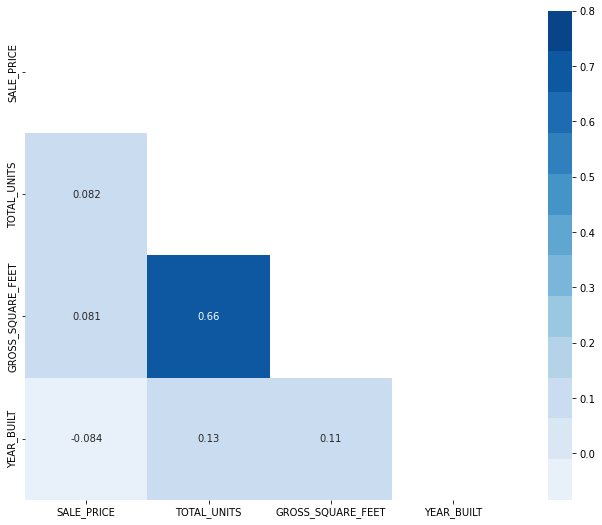

In [60]:
#correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
matrix = np.triu(np.ones_like(corrmat))
colormap = sns.color_palette("Blues",12)
sns.heatmap(corrmat,vmax=.8, square=True, annot=True, cmap=colormap,mask=matrix)
#plt.savefig('heatmap',bbox_inches="tight",dpi=300)

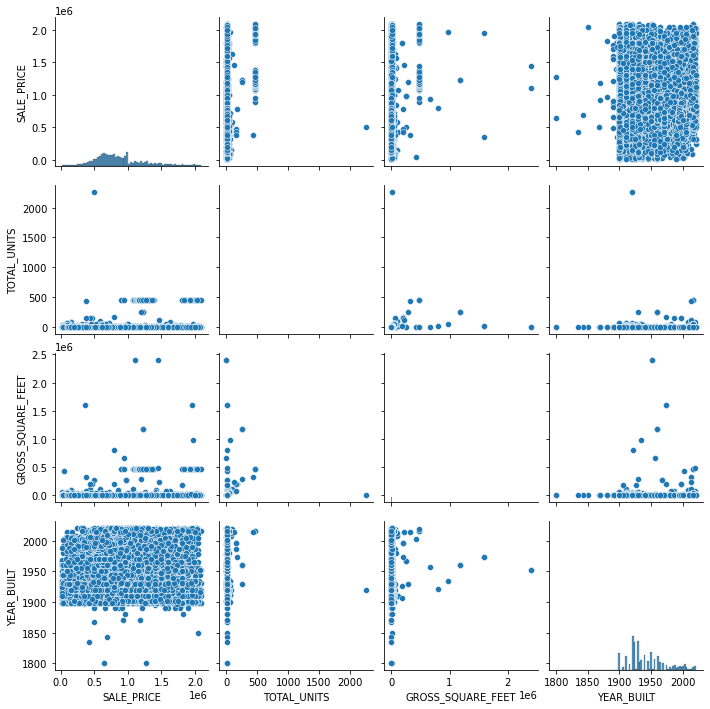

In [61]:
sns.pairplot(df1) 

In [62]:
y = df1['SALE_PRICE']
x = df1[['TOTAL_UNITS', 'GROSS_SQUARE_FEET','YEAR_BUILT']]
x = sm.add_constant(x)
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.20e-99
Time:                        14:34:54   Log-Likelihood:            -3.7360e+05
No. Observations:               26185   AIC:                         7.472e+05
Df Residuals:                   26181   BIC:                         7.472e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.268e+06   1.51e+05     21.649      0.000    2.97e+06    3.56e+06
TOTAL_UNITS         716.1480     95.452      7.503      0.000     529.056     903.240
GROSS_SQUARE_FEET     0.4453      0.070      6.334      0.000       0.308       0.583
YEAR_BUILT        -1232.5983     77.651    -15.874      0.000   -1384.798   -1080.399
==============================================================================
Omnibus:                     2127.536   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2695.928
Skew:                           0.746   Prob(JB):                         0.00
Kurtosis:                       3.497   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
y = df1['SALE_PRICE']
x = df1[['GROSS_SQUARE_FEET','YEAR_BUILT']]
x = sm.add_constant(x)
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.13e-88
Time:                        14:34:54   Log-Likelihood:            -3.7363e+05
No. Observations:               26185   AIC:                         7.473e+05
Df Residuals:                   26182   BIC:                         7.473e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               3.18e+06   1.51e+05     21.109      0.000    2.88e+06    3.48e+06
GROSS_SQUARE_FEET     0.7900      0.053     14.832      0.000       0.686       0.894
YEAR_BUILT        -1186.8536     77.492    -15.316      0.000   -1338.743   -1034.964
==============================================================================
Omnibus:                     2125.026   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2691.225
Skew:                           0.746   Prob(JB):                         0.00
Kurtosis:                       3.492   Cond. No.                     2.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
df1['units_square_feet']=df1['TOTAL_UNITS']*df1['GROSS_SQUARE_FEET']

In [65]:
y = df1['SALE_PRICE']
x = df1[[ 'TOTAL_UNITS','GROSS_SQUARE_FEET','YEAR_BUILT','units_square_feet']]
x = sm.add_constant(x)
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.91e-100
Time:                        14:34:54   Log-Likelihood:            -3.7359e+05
No. Observations:               26185   AIC:                         7.472e+05
Df Residuals:                   26180   BIC:                         7.472e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.294e+06   1.51e+05     21.790      0.000       3e+06    3.59e+06
TOTAL_UNITS         349.0440    155.566      2.244      0.025      44.127     653.961
GROSS_SQUARE_FEET     0.3090      0.084      3.688      0.000       0.145       0.473
YEAR_BUILT        -1245.7174     77.763    -16.019      0.000   -1398.137   -1093.298
units_square_feet     0.0012      0.000      2.988      0.003       0.000       0.002
==============================================================================
Omnibus:                     2146.752   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2720.106
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                       3.472   Cond. No.                     9.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Log Transformation

In [66]:
df1['Log_Price']=np.log(df1['SALE_PRICE'])

In [67]:
df1

,SALE_PRICE,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,units_square_feet,Log_Price
0,720000.0,3.0,2820.0,1952.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,8460.0,13.487006
1,499999.0,1.0,1260.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1260.0,13.122361
2,599000.0,1.0,1296.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1296.0,13.303017
3,455000.0,1.0,1296.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1296.0,13.028053
4,580000.0,1.0,1516.0,1910.0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1516.0,13.270783
...,...,...,...,...,...,...,...,...,...
98258,765000.0,2.0,2500.0,1995.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,5000.0,13.547631
98261,715000.0,2.0,2400.0,1994.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,4800.0,13.480038
98264,710000.0,2.0,2451.0,1998.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,4902.0,13.473020
98265,675000.0,2.0,2007.0,1998.0,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,4014.0,13.422468


In [68]:
y_log = df1['Log_Price']
x = df1[[ 'TOTAL_UNITS','GROSS_SQUARE_FEET','YEAR_BUILT','units_square_feet']]
x = sm.add_constant(x)
model = sm.OLS(y_log, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     48.06
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.44e-40
Time:                        14:34:54   Log-Likelihood:                -19697.
No. Observations:               26185   AIC:                         3.940e+04
Df Residuals:                   26180   BIC:                         3.945e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.2665      0.204     74.788      0.000      14.866      15.667
TOTAL_UNITS       -5.688e-05      0.000     -0.271      0.787      -0.000       0.000
GROSS_SQUARE_FEET  1.721e-07   1.13e-07      1.521      0.128   -4.96e-08    3.94e-07
YEAR_BUILT           -0.0009      0.000     -8.300      0.000      -0.001      -0.001
units_square_feet  2.378e-09   5.64e-10      4.215      0.000    1.27e-09    3.48e-09
==============================================================================
Omnibus:                    11384.686   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110349.366
Skew:                          -1.838   Prob(JB):                         0.00
Kurtosis:                      12.361   Cond. No.                     9.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
df1['BUILDING_CLASS_CATEGORY'].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '22 STORE BUILDINGS',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '37 RELIGIOUS FACILITIES', '06 TAX CLASS 1 - OTHER',
       '07 RENTALS - WALKUP APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '21 OFFICE BUILDINGS', '38 ASYLUMS AND HOMES',
       '33 EDUCATIONAL FACILITIES', '08 RENTALS - ELEVATOR APARTMENTS',
       '27 FACTORIES', '41 TAX CLASS 4 - OTHER',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '05 TAX CLASS 1 VACANT LAND', '11 SPECIAL CONDO BILLING LOTS',
       '25 LUXURY HOTELS', '32 HOSPITAL AND HEALTH FACILITIES'],
      dtype=object)

### Add dummies

In [103]:
#before one hot encoding
df1['NEIGHBORHOOD'].sort_values().values       # "AIRPORT LA GUARDIA" will be dropped

array(['AIRPORT LA GUARDIA', 'AIRPORT LA GUARDIA', 'AIRPORT LA GUARDIA',
       ..., 'WYCKOFF HEIGHTS', 'WYCKOFF HEIGHTS', 'WYCKOFF HEIGHTS'],
      dtype=object)

In [106]:
df1['BOROUGH'].sort_values().values           #'Bronx' will be dropped

array(['Bronx', 'Bronx', 'Bronx', ..., 'Staten_Island', 'Staten_Island',
       'Staten_Island'], dtype=object)

In [101]:
df1['BUILDING_CLASS_CATEGORY'].sort_values().values

array(['01 ONE FAMILY DWELLINGS', '01 ONE FAMILY DWELLINGS',
       '01 ONE FAMILY DWELLINGS', ..., '41 TAX CLASS 4 - OTHER',
       '41 TAX CLASS 4 - OTHER', '41 TAX CLASS 4 - OTHER'], dtype=object)

In [104]:
# Rename '41 TAX CLASS 4 - OTHER' to make it the alphabetically first
df1['BUILDING_CLASS_CATEGORY']=df1['BUILDING_CLASS_CATEGORY'].str.replace("41 TAX CLASS 4 - OTHER","00141 TAX CLASS 4 - OTHER")

In [105]:
df1['BUILDING_CLASS_CATEGORY'].sort_values().values     #'00141 TAX CLASS 4 - OTHER' will be dropped

array(['00141 TAX CLASS 4 - OTHER', '00141 TAX CLASS 4 - OTHER',
       '00141 TAX CLASS 4 - OTHER', ..., '37 RELIGIOUS FACILITIES',
       '37 RELIGIOUS FACILITIES', '38 ASYLUMS AND HOMES'], dtype=object)

In [107]:
df2=pd.get_dummies(df1, drop_first=True)

In [109]:
y = df2['SALE_PRICE']
x = df2.drop(columns = ['SALE_PRICE','Log_Price'])
x = sm.add_constant(x)
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     89.73
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:56:51   Log-Likelihood:            -3.6533e+05
No. Observations:               26185   AIC:                         7.312e+05
Df Residuals:                   25920   BIC:                         7.334e+05
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                            -1.561e+06   1.69e+05     -9.220      0.000   -1.89e+06   -1.23e+06
TOTAL_UNITS                                                       -341.3435    128.143     -2.664      0.008    -592.511     -90.176
GROSS_SQUARE_FEET                                                    0.3475      0.082      4.243      0.000       0.187       0.508
YEAR_BUILT                                                        1184.3419     72.459     16.345      0.000    1042.319    1326.365
units_square_feet                                                    0.0008      0.001      1.442      0.149      -0.000       0.002
BOROUGH_Brooklyn                                                  3.309e+05   1.58e+04     21.002      0.000       3e+05    3.62e+05
BOROUGH_Manhattan                                                   2.7e+05   3.51e+04      7.689      0.000    2.01e+05    3.39e+05
BOROUGH_Queens                                                    1.433e+05   1.19e+05      1.203      0.229   -9.02e+04    3.77e+05
BOROUGH_Staten_Island                                            -3.316e+05   1.31e+05     -2.539      0.011   -5.88e+05   -7.57e+04
NEIGHBORHOOD_ALPHABET CITY                                       -8.042e+05    1.6e+05     -5.035      0.000   -1.12e+06   -4.91e+05
NEIGHBORHOOD_ANNADALE                                             4.189e+05   1.38e+05      3.031      0.002    1.48e+05     6.9e+05
NEIGHBORHOOD_ARDEN HEIGHTS                                         8.72e+04   1.37e+05      0.635      0.525   -1.82e+05    3.56e+05
NEIGHBORHOOD_ARROCHAR                                             2.594e+05   1.48e+05      1.758      0.079   -2.99e+04    5.49e+05
NEIGHBORHOOD_ARROCHAR-SHORE ACRES                                 1.525e+05   1.57e+05      0.974      0.330   -1.54e+05    4.59e+05
NEIGHBORHOOD_ARVERNE                                             -3.776e+05   1.27e+05     -2.962      0.003   -6.27e+05   -1.28e+05
NEIGHBORHOOD_ASTORIA                                              2.403e+05   1.26e+05      1.913      0.056   -5910.682    4.87e+05
NEIGHBORHOOD_BATH BEACH                                           1204.7911   2.44e+04      0.049      0.961   -4.66e+04     4.9e+04
NEIGHBORHOOD_BATHGATE                                            -1.306e+05   4.74e+04     -2.758      0.006   -2.23e+05   -3.78e+04
NEIGHBORHOOD_BAY RIDGE                                             1.68e+05    1.8e+04      9.331      0.000    1.33e+05    2.03e+05
NEIGHBORHOOD_BAYCHESTER                                          -1.915e+05   2.26e+04     -8.464      0.000   -2.36e+05   -1.47e+05
NEIGHBORHOOD_BAYSIDE    

In [110]:
# y1 = df2['SALE_PRICE']
# x1 = df2.drop(columns = ['SALE_PRICE','TOTAL_UNITS','units*square_feet'])
# x1 = sm.add_constant(x1)
# model = sm.OLS(y1, x1)
# fit = model.fit()
# fit.summary()

In [111]:
# y_log = df2['Log_Price']
# x = df2.drop(columns = ['SALE_PRICE','Log_Price'])
# x = sm.add_constant(x)
# model = sm.OLS(y_log, x)
# fit = model.fit()
# fit.summary()

In [112]:
# x.columns

In [113]:
del df2['Log_Price']

In [114]:
y = df2['SALE_PRICE']
x = df2.drop(columns = ['SALE_PRICE'])

In [115]:
print(x.columns.to_list())

['TOTAL_UNITS', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'units_square_feet', 'BOROUGH_Brooklyn', 'BOROUGH_Manhattan', 'BOROUGH_Queens', 'BOROUGH_Staten_Island', 'NEIGHBORHOOD_ALPHABET CITY', 'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_ARDEN HEIGHTS', 'NEIGHBORHOOD_ARROCHAR', 'NEIGHBORHOOD_ARROCHAR-SHORE ACRES', 'NEIGHBORHOOD_ARVERNE', 'NEIGHBORHOOD_ASTORIA', 'NEIGHBORHOOD_BATH BEACH', 'NEIGHBORHOOD_BATHGATE', 'NEIGHBORHOOD_BAY RIDGE', 'NEIGHBORHOOD_BAYCHESTER', 'NEIGHBORHOOD_BAYSIDE', 'NEIGHBORHOOD_BEDFORD PARK/NORWOOD', 'NEIGHBORHOOD_BEDFORD STUYVESANT', 'NEIGHBORHOOD_BEECHHURST', 'NEIGHBORHOOD_BELLE HARBOR', 'NEIGHBORHOOD_BELLEROSE', 'NEIGHBORHOOD_BELMONT', 'NEIGHBORHOOD_BENSONHURST', 'NEIGHBORHOOD_BERGEN BEACH', 'NEIGHBORHOOD_BLOOMFIELD', 'NEIGHBORHOOD_BOERUM HILL', 'NEIGHBORHOOD_BOROUGH PARK', 'NEIGHBORHOOD_BRIARWOOD', 'NEIGHBORHOOD_BRIGHTON BEACH', 'NEIGHBORHOOD_BROAD CHANNEL', 'NEIGHBORHOOD_BRONX PARK', 'NEIGHBORHOOD_BRONXDALE', 'NEIGHBORHOOD_BROOKLYN HEIGHTS', 'NEIGHBORHOOD_BROWNSVILLE', 

In [116]:
x, x_test, y, y_test = train_test_split(x, y, test_size=.2,random_state=6)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25, random_state=10)

lm = LinearRegression()
lm.fit(x_train, y_train)
    
print (f"train r score: {round(lm.score(x_train, y_train),3)}")
print (f"validation r score: {round(lm.score(x_val, y_val),3)}")
print (f"test r score: {round(lm.score(x_test, y_test),3)}")

train r score: 0.477
validation r score: 0.368
test r score: 0.487


In [117]:
print(x_test.columns.to_list())

['TOTAL_UNITS', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'units_square_feet', 'BOROUGH_Brooklyn', 'BOROUGH_Manhattan', 'BOROUGH_Queens', 'BOROUGH_Staten_Island', 'NEIGHBORHOOD_ALPHABET CITY', 'NEIGHBORHOOD_ANNADALE', 'NEIGHBORHOOD_ARDEN HEIGHTS', 'NEIGHBORHOOD_ARROCHAR', 'NEIGHBORHOOD_ARROCHAR-SHORE ACRES', 'NEIGHBORHOOD_ARVERNE', 'NEIGHBORHOOD_ASTORIA', 'NEIGHBORHOOD_BATH BEACH', 'NEIGHBORHOOD_BATHGATE', 'NEIGHBORHOOD_BAY RIDGE', 'NEIGHBORHOOD_BAYCHESTER', 'NEIGHBORHOOD_BAYSIDE', 'NEIGHBORHOOD_BEDFORD PARK/NORWOOD', 'NEIGHBORHOOD_BEDFORD STUYVESANT', 'NEIGHBORHOOD_BEECHHURST', 'NEIGHBORHOOD_BELLE HARBOR', 'NEIGHBORHOOD_BELLEROSE', 'NEIGHBORHOOD_BELMONT', 'NEIGHBORHOOD_BENSONHURST', 'NEIGHBORHOOD_BERGEN BEACH', 'NEIGHBORHOOD_BLOOMFIELD', 'NEIGHBORHOOD_BOERUM HILL', 'NEIGHBORHOOD_BOROUGH PARK', 'NEIGHBORHOOD_BRIARWOOD', 'NEIGHBORHOOD_BRIGHTON BEACH', 'NEIGHBORHOOD_BROAD CHANNEL', 'NEIGHBORHOOD_BRONX PARK', 'NEIGHBORHOOD_BRONXDALE', 'NEIGHBORHOOD_BROOKLYN HEIGHTS', 'NEIGHBORHOOD_BROWNSVILLE', 

In [118]:
y_pred=lm.predict(x_test)
y_pred

array([ 734527.1371197 , 1510774.83842102, 1388419.40289778, ...,
        527948.26932137,  952263.57673606, 1187865.90996543])

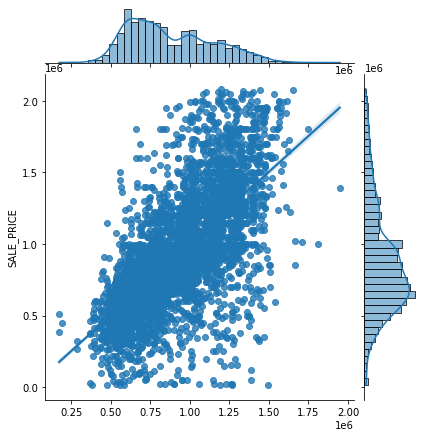

In [122]:
sns.jointplot(y_pred, y_test,kind='reg')

In [123]:
#x_train

In [124]:
x_train.to_pickle('x_train.pkl')

In [125]:
x_train.to_csv('x_train.csv')

In [126]:
# pickling the model
pickle_out = open("lm.pkl", "wb")
pickle.dump(lm, pickle_out)
pickle_out.close()

In [127]:

pickle_in = open('/Users/Layla/Desktop/Metis/Engineering/project/lm.pkl', 'rb')
lm_model = pickle.load(pickle_in)

In [128]:
lm_model

LinearRegression()

# Thus far, the above saved model and data are the final ones Im going to use for further deployment.
There are also other models I tried for this project, but none of them outperforms the simple linear regression.

In [88]:
# y = df2['SALE_PRICE']
# x = df2.drop(columns = ['SALE_PRICE','TOTAL_UNITS','units*square_feet'])

# x, x_test, y, y_test = train_test_split(x, y, test_size=.2,random_state=6)
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25, random_state=10)

# lm = LinearRegression()
# lm.fit(x_train, y_train)
    
# print (f"train r score: {round(lm.score(x_train, y_train),3)}")
# print (f"validation r score: {round(lm.score(x_val, y_val),3)}")
# print (f"test r score: {round(lm.score(x_test, y_test),3)}")

In [89]:
# y_pred=lm.predict(x_test)
# y_pred

In [90]:
# sns.jointplot(y_pred, y_test,kind='reg')

In [92]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import r2_score

# # Create polynomial features
# poly = PolynomialFeatures(degree=2)
# x_train_poly = poly.fit_transform(x_train)

# # Apply polynomial transformation to val set
# x_val_poly = poly.fit_transform(x_val)

# # Fit a model using polynomial features
# lr_poly = LinearRegression()
# lr_poly.fit(x_train_poly,y_train)

# print(lr_poly.score(x_train_poly,y_train))
# print(lr_poly.score(x_val_poly,y_val))

In [129]:
# lr_poly.predict()

## Regularization 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,random_state=42)

In [ ]:
## .fit finds the mean and standard deviation of each variable in the training set
std = StandardScaler()
std.fit(x_train.values)

## apply the scaler to the train set
x_tr = std.transform(x_train.values)
## Apply the scaler to the test set
x_te = std.transform(x_test.values)

In [ ]:
alphas = np.logspace(-5,5,200)

lr_model_ridge = RidgeCV(alphas = alphas, cv=5)      
lr_model_ridge.fit(x_tr, y_train)
ridge_test_r2 = lr_model_ridge.score(x_te, y_test)

print(f'train R-squared: {round(lr_model_ridge.score(x_tr, y_train),3)}')
print(f'test R-squared: {round(lr_model_ridge.score(x_te, y_test),3)}')
print(f'alpha:{lr_model_ridge.alpha_}')
#list(zip(x_train.columns, lr_model_ridge.coef_))

In [ ]:
alphas = np.logspace(-5,5,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(x_tr, y_train)

print(f'LASSO_train R-squared: {round(lasso_model.score(x_tr, y_train),3)}')
print(f'LASSO_test R-squared: {round(lasso_model.score(x_te, y_test),3)}')
print(f'alpha: {lasso_model.alpha_}')
#list(zip(x_train.columns, lasso_model.coef_))

In [ ]:
y_pred = lasso_model.predict(x_te)
h=sns.jointplot(y_pred, y_test,kind='reg')
# h.fig.suptitle("Predict on Test Data",fontsize=16)
h.set_axis_labels('Price_predict', 'Price_test',fontsize=12)
# plt.savefig('Lasso',bbox_inches="tight",dpi=300)

In [ ]:
alphas = np.logspace(-4, 4, 200)

enet_model = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], 
                          alphas = alphas, 
                          cv=5,
                          random_state=42)

enet_model.fit(x_tr, y_train)

r_squared_train = enet_model.score(x_tr, y_train)
r_squared_test = enet_model.score(x_te, y_test)
alpha = enet_model.alpha_
l1_ratio = enet_model.l1_ratio_

print("r_squared_train: ", round(r_squared_train, 3))
print("r_squared_test: ", round(r_squared_test, 3))
print(f"alpha: {alpha}")
#print("l1_ratio: ", l1_ratio)

#print(list(zip(x_train.columns, enet_model.coef_)))

In [ ]:
#save the lasso model 

In [132]:
# save the model to disk

# with open('property_model.pkl', 'wb') as files:
#     pickle.dump(lasso_model, files)
 

 
# load the model from disk
# lasso_model = pickle.load(open('property_model.pkl', 'rb'))
# result = loaded_model.score(x_te, y_test)
# print(result)

## Geocoding address

In [ ]:
# from geopy.geocoders import Nominatim
# locator = Nominatim(user_agent="example app")

In [ ]:
# locator.geocode('Champ de Mars, Paris, France')

In [ ]:
# locator.geocode('443 EAST 180 STREET')

In [ ]:
# locator.geocode('443 EAST 180 STREET, New York City, New York')

In [ ]:
# df["loc"] = df["ADDRESS"].apply(locator.geocode)

In [ ]:
# from geopy.extra.rate_limiter import RateLimiter

# # 1 - conveneint function to delay between geocoding calls
# geocode = RateLimiter(locator.geocode, min_delay_seconds=5)
# # 2- - create location column
# df['location'] = df['ADDRESS'].apply(geocode)
# # 3 - create longitude, laatitude and altitude from location column (returns tuple)
# df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# # 4 - split point column into latitude, longitude and altitude columns
# df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [ ]:
# df.info()

In [ ]:
# df.ADDRESS

In [ ]:
# locator.geocode('443 E 180th St, Bronx, NY 10457')

In [ ]:
# locator.geocode('443 E 180th St, 10457')

In [ ]:
# df['add_zip']=df['ADDRESS']+ ','+ df['BOROUGH']+ ','+ df['ZIP CODE']

In [ ]:
# df['add_zip']

## sth

In [ ]:
round(df.groupby(['BOROUGH'])['SALE PRICE'].mean())

In [ ]:
round(df.groupby(['NEIGHBORHOOD'])['SALE PRICE'].mean())

In [ ]:
round(df.groupby(['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY'])['SALE PRICE'].mean()).reset_index()

# Modeling

### Adding dummies 

In [ ]:
df1=df[['SALE PRICE','TOTAL UNITS','GROSS SQUARE FEET','YEAR BUILT','units*square_feet','BOROUGH','neighborhood','BUILDING CLASS CATEGORY']]
df1

In [ ]:
df1=pd.get_dummies(df1, drop_first=True)

In [ ]:
y = df1['SALE PRICE']
x = df1.drop(columns = ['SALE PRICE'])
x = sm.add_constant(x)
model = sm.OLS(y, x)
fit = model.fit()
fit.summary()